<a href="https://colab.research.google.com/github/jessamcs/Week11_DeepLearning/blob/main/Titanic_RNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Boosting Exercise (Core) for Kaggle Competition**

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
# Get data
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Fill in the Missing Data
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Pclass'].fillna(df['Pclass'].median(), inplace = True)

# Binarize target column/s
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [6]:
# Save X data
X = df.drop(columns = ['Survived', 'Cabin', 'Name', 'Ticket', 'Embarked'])
# Encode our target
y = df['Survived']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


GradientBoostingClassifier()

In [8]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [9]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [10]:
print('Training accuracy:', gbc.score(X_train, y_train))
print('Testing accuracy:', gbc.score(X_test, y_test))

print('Training accuracy:', lgbm.score(X_train, y_train))
print('Testing accuracy:', lgbm.score(X_test, y_test))

print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.9161676646706587
Testing accuracy: 0.7937219730941704
Training accuracy: 0.9925149700598802
Testing accuracy: 0.7847533632286996
Training accuracy: 0.9011976047904192
Testing accuracy: 0.7937219730941704


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training R2', lr.score(X_train, y_train))
print('Testing R2', lr.score(X_test, y_test))

Training R2 0.4112897974022377
Testing R2 0.33385244229502564


In [12]:
# Get data
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Pclass'].fillna(test['Pclass'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

# Binarize target column
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
# Clean the test data
to_model = test.drop(columns = ['Cabin', 'Name', 'Ticket', 'Embarked'])

In [16]:
preds = gbc.predict(to_model)
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [17]:
to_submit = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': preds})
to_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [18]:
to_submit.to_csv('/content/sample_data/submission.csv', index=False)

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


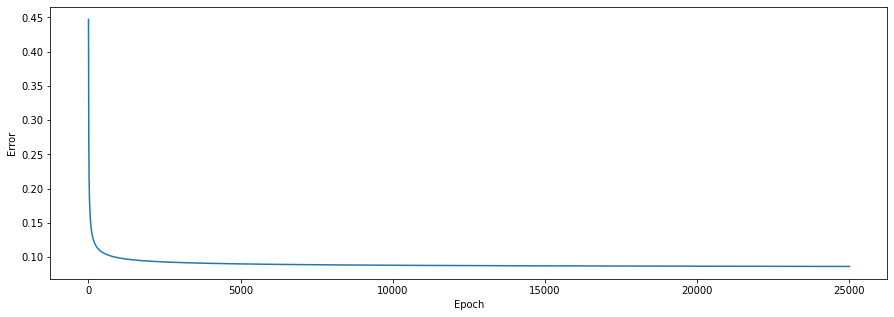

In [19]:
# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()